In [1]:
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [30]:
secretnumber = '100101'

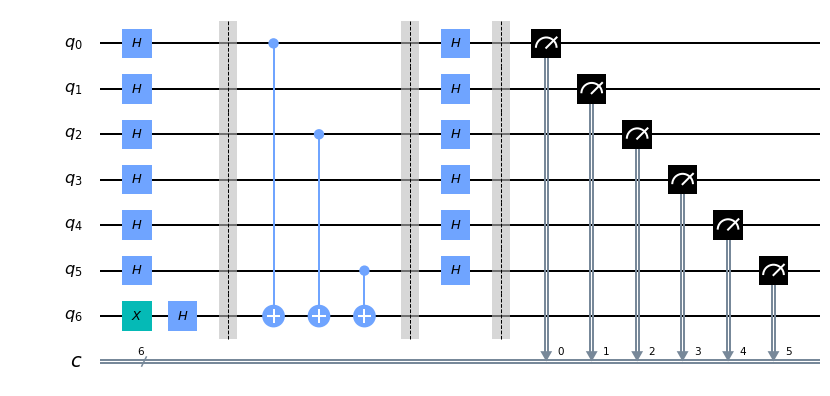

In [31]:
lenSecret = len(secretnumber)

qc = QuantumCircuit(lenSecret+1,lenSecret)

qc.h(range(lenSecret))
qc.x(lenSecret)
qc.h(lenSecret)

qc.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1': 
        qc.cx(ii, lenSecret)


qc.barrier()
qc.h(range(lenSecret))
qc.barrier()
qc.measure(range(lenSecret),range(lenSecret))

qc.draw(output='mpl')

In [32]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc, backend = simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'100101': 1}
